# Imports

In [19]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid

# Load the Images
reference:https://medium.com/analytics-vidhya/how-to-load-any-image-dataset-in-python-3bd2fa2cb43d

In [1]:
# Prepare your dataset here
from ImagesLoader import MasterImage
path  = "./Data/"
input_shape = 64
image_data = MasterImage(PATH= path,IMAGE_SIZE = input_shape)
(images, labels)=image_data.load_dataset()

c:\Users\river\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\river\anaconda3\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
c:\Users\river\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


Could not Found Pickle File 
Loading File and Dataset  ..........
Found Categories  ['1', '10', '2', '3', '4', '5', '6', '7', '8', '9'] 

Pickled Image Successfully 


d:\DEBI\Uottawa\Computer Vision\project\CV_Hand_Gestures\ImagesLoader.py:52: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data = np.asanyarray(self.image_data)


In [2]:
labels

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1, 10, 10, 10, 10, 10, 10, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,  5,  5,  5,  5,  5,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
        5,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  7,  7,  7,  7,  7,  7,
        7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,
        7,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8

In [3]:
image_data.list_categories

['1', '10', '2', '3', '4', '5', '6', '7', '8', '9']

In [5]:
images[3].max()

238

### Train test split

In [4]:
from sklearn.model_selection import train_test_split

# train_sample_size = 4000
# test_sample_size = 1000
X_train ,X_test, y_train, y_test = train_test_split(images,labels, test_size=.1,random_state=0)
X_train_gray ,X_test_gray, _, _ = train_test_split(images[:,:,:,0],labels, test_size=.1,random_state=0)


c:\Users\river\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

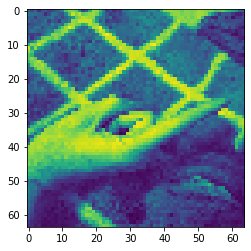

<IPython.core.display.Javascript object>

1

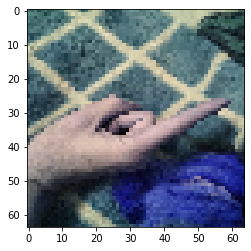

In [5]:
plt.imshow(X_train_gray[0])
plt.show()
plt.imshow(X_train[0])

y_train[0]

In [6]:
assert X_train.shape[0] == y_train.shape[0]
assert X_test.shape[0] == y_test.shape[0]

### Visualize five samples of each class by plotting a grid using the matplotlib library

In [7]:
num_labels = len(np.unique(labels))

<IPython.core.display.Javascript object>

In [8]:
from matplotlib import rcParams
import matplotlib.pyplot as plt
# figure size in inches
rcParams['figure.figsize'] = 11.7,8.27

In [15]:
import random 


random.seed(100) # set a seed in case you want your experiments to be consistent

visualize_samples = []
sampleIndexes =[]
for i in range(num_labels):
    images = X_train[np.array(y_train==i).reshape(-1)]
    allIndexes = list(range(0,len(images)))
    sampleIndexes = random.sample(allIndexes,5)
    visualize_samples.append(images[sampleIndexes])

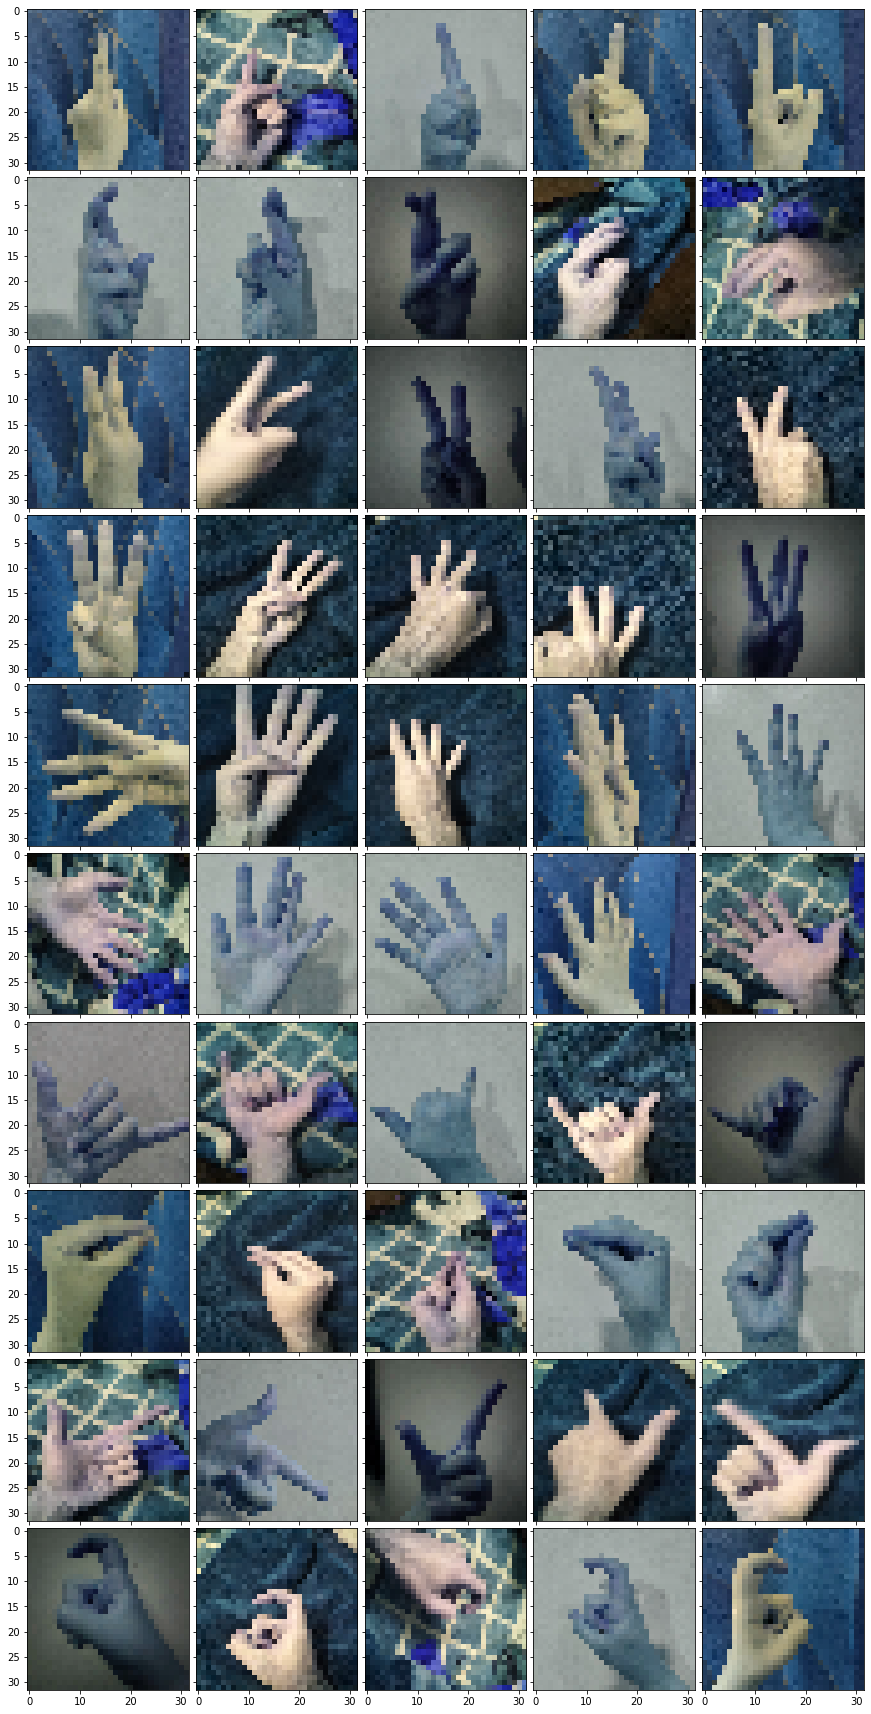

In [16]:



fig = plt.figure(figsize=(15., 200.))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                    nrows_ncols=(num_labels, 5),  
                    axes_pad=0.1,  # pad between axes in inch.
                    )
g = 0
for r in range(num_labels):
    for c in range(5):
        grid[g].imshow(visualize_samples[r][c])
        g+=1
plt.show()

# Featue Enginearing

## Thresholding

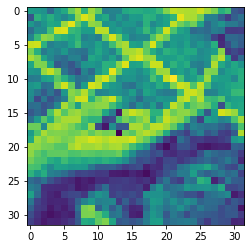

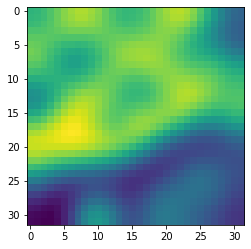

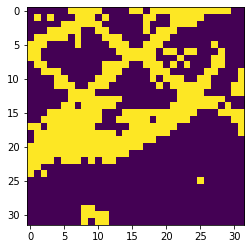

In [61]:
import cv2

# convert the image to grayscale, blur it, and threshold it
gray = cv2.cvtColor(X_train[0], cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (13, 13), -100)
thresh = cv2.threshold(gray, 130, 255, cv2.THRESH_BINARY)[1]
# thresh = cv2.bitwise_not(X_train[13])
# thresh[thresh > 215] = 255
plt.imshow(gray)
plt.show()
plt.imshow(blurred)
plt.show()
plt.imshow(thresh)
plt.show()


reference:https://scikit-image.org/docs/stable/api/skimage.filters.html#skimage.filters.threshold_otsu

In [42]:
def plot_histogram(image, axes, bins=256):
    """Plot an image's histogram along with cumulative histogram.
       Adapted from the scikit-image examples
    """
    image = skimage.img_as_float(image)
    ax_img, ax_hist = axes
    ax_cdf = ax_hist.twinx()

    # Display image
    ax_img.imshow(image, cmap=plt.cm.gray)
    ax_img.set_axis_off()

    # Display histogram with mathplot hist
    ax_hist.hist(image.ravel(), bins=bins, histtype='step', color='black')
    ax_hist.ticklabel_format(axis='y', style='scientific', scilimits=(0, 0))
    ax_hist.set_xlabel('Pixel intensity')
    ax_hist.set_xlim(0, 1)
    ax_hist.set_yticks([])

    # Display cumulative distribution
    img_cdf, bins = skimage.exposure.cumulative_distribution(image, bins)
    ax_cdf.plot(bins, img_cdf, 'r')
    ax_cdf.set_yticks([])

    return ax_img, ax_hist, ax_cdf

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'original image')

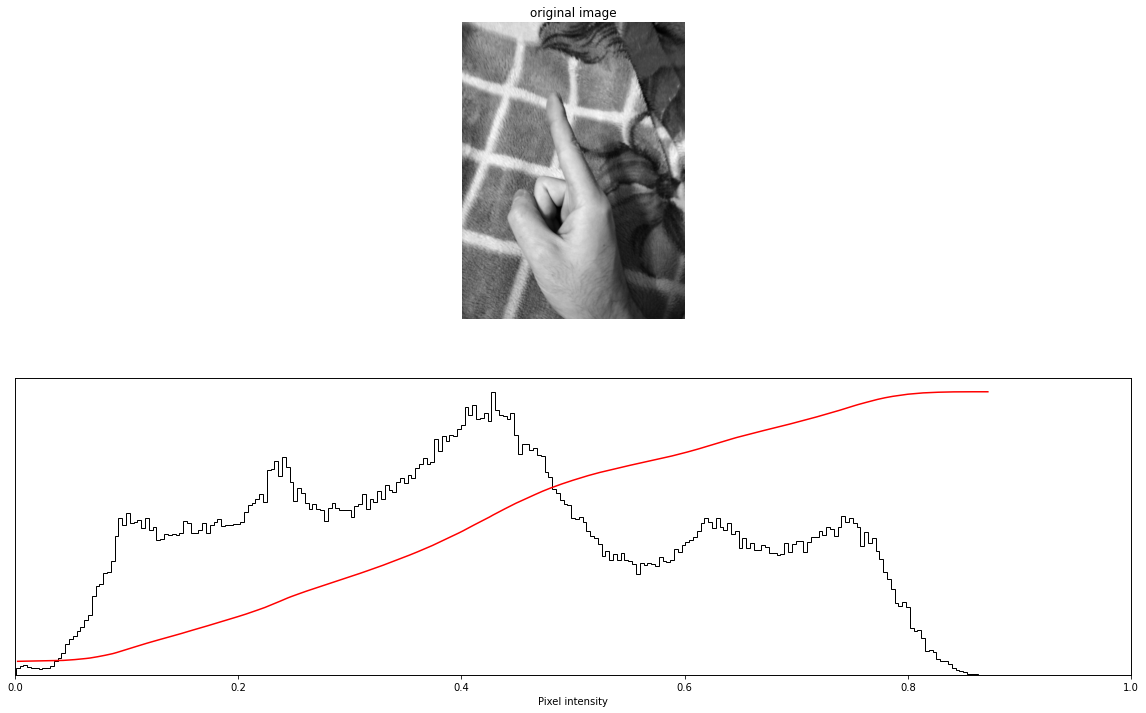

In [43]:
from skimage.io import imread
image = skimage.io.imread('./Data/1/IMG20221006164921.jpg',as_gray=True)
fig, axs = plt.subplots(2, 1,figsize=(20, 12))

ax_img, ax_hist, ax_cdf = plot_histogram(image, axs)
ax_img.set_title('original image')

0.57


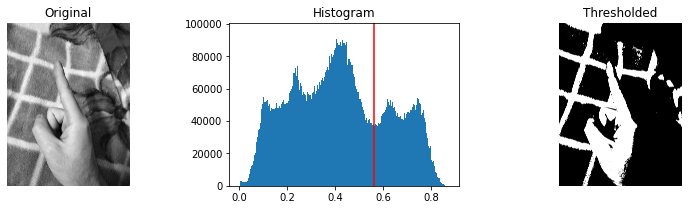

In [ ]:
thresh = .57
print(thresh)
thresh = int(thresh*100)/100
binary = (image>thresh).astype(float)
# dispImage(binary)

fig, axes = plt.subplots(ncols=3, figsize=(14, 3))
ax = axes.ravel()
ax[0] = plt.subplot(1, 3, 1)
ax[1] = plt.subplot(1, 3, 2)
ax[2] = plt.subplot(1, 3, 3, sharex=ax[0], sharey=ax[0])

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title('Original')
ax[0].axis('off')

ax[1].hist(image.ravel(), bins=256)
ax[1].set_title('Histogram')
ax[1].axvline(thresh, color='r')

ax[2].imshow(binary, cmap=plt.cm.gray)
ax[2].set_title('Thresholded')
ax[2].axis('off')

plt.show()

63


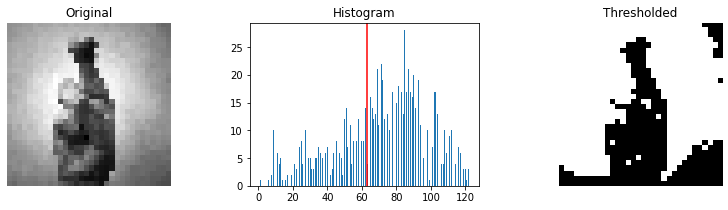

In [81]:
from skimage.filters import threshold_minimum, threshold_otsu
image = X_train[21,:,:,0]
thresh = threshold_otsu(image)
print(thresh)
thresh = int(thresh*100)/100
binary = (image>thresh).astype(float)
# dispImage(binary)

fig, axes = plt.subplots(ncols=3, figsize=(14, 3))
ax = axes.ravel()
ax[0] = plt.subplot(1, 3, 1)
ax[1] = plt.subplot(1, 3, 2)
ax[2] = plt.subplot(1, 3, 3, sharex=ax[0], sharey=ax[0])

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title('Original')
ax[0].axis('off')

ax[1].hist(image.ravel(), bins=256)
ax[1].set_title('Histogram')
ax[1].axvline(thresh, color='r')

ax[2].imshow(binary, cmap=plt.cm.gray)
ax[2].set_title('Thresholded')
ax[2].axis('off')

plt.show()

In [63]:
%pip install imutils

  Created wheel for imutils: filename=imutils-0.5.4-py3-none-any.whl size=25847 sha256=cff19dfc4c4d8a51887796ec655f0eaa53e9be480ec99876e38daa3c78edb5cc
  Stored in directory: c:\users\river\appdata\local\pip\cache\wheels\59\1b\52\0dea905f8278d5514dc4d0be5e251967f8681670cadd3dca89
Successfully built imutils
Note: you may need to restart the kernel to use updated packages.


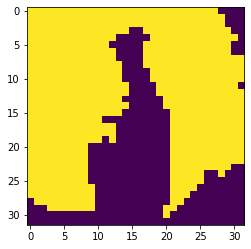

In [82]:
from imutils.paths import list_images
import numpy as np
import argparse
import pickle
import imutils
import cv2

outline = np.zeros(binary.shape, dtype = "uint8")
x = cv2.convertScaleAbs(binary)
cnts = cv2.findContours(x, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
cnts = sorted(cnts, key = cv2.contourArea, reverse = True)[0]
cv2.drawContours(outline, [cnts], -1, 255, -1)
plt.imshow(outline)

In [83]:
outline

array([[255, 255, 255, ...,   0,   0,   0],
       [255, 255, 255, ...,   0,   0,   0],
       [255, 255, 255, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8)

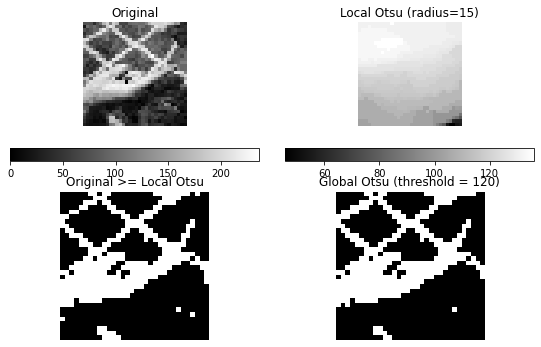

In [49]:
from skimage.morphology import disk
from skimage.filters import threshold_otsu, rank
from skimage.util import img_as_ubyte


img = img_as_ubyte(image=image)

radius = 15
footprint = disk(radius)

local_otsu = rank.otsu(img, footprint)
threshold_global_otsu = threshold_otsu(img)
global_otsu = img >= threshold_global_otsu

fig, axes = plt.subplots(2, 2, figsize=(8, 5), sharex=True, sharey=True)
ax = axes.ravel()
plt.tight_layout()

fig.colorbar(ax[0].imshow(img, cmap=plt.cm.gray),
             ax=ax[0], orientation='horizontal')
ax[0].set_title('Original')
ax[0].axis('off')

fig.colorbar(ax[1].imshow(local_otsu, cmap=plt.cm.gray),
             ax=ax[1], orientation='horizontal')
ax[1].set_title('Local Otsu (radius=%d)' % radius)
ax[1].axis('off')

ax[2].imshow(img >= local_otsu, cmap=plt.cm.gray)
ax[2].set_title('Original >= Local Otsu' % threshold_global_otsu)
ax[2].axis('off')

ax[3].imshow(global_otsu, cmap=plt.cm.gray)
ax[3].set_title('Global Otsu (threshold = %d)' % threshold_global_otsu)
ax[3].axis('off')

plt.show()

## Zernike Moments 
Reference guid: https://pyimagesearch.com/2014/04/07/building-pokedex-python-indexing-sprites-using-shape-descriptors-step-3-6/

In [95]:
%pip install numpy --upgrade
%pip install mahotas

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [9]:
from skimage.filters import threshold_minimum, threshold_otsu

def getZernike(img,radius = 21):
    thresh = threshold_otsu(img)
    thresh = int(thresh*100)/100
    binary = (img < thresh).astype(float)
    outline = np.zeros(binary.shape, dtype = "uint8")
    x = cv2.convertScaleAbs(binary)
    cnts = cv2.findContours(x, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    cnts = sorted(cnts, key = cv2.contourArea, reverse = True)[0]
    cv2.drawContours(outline, [cnts], -1, 255, -1)
    zernike  = zernike_moments(outline, redius)
    return zernike

In [ ]:
from mahotas.features import zernike_moments
X_train_z = []
X_test_z = []
redius = 21
for img in X_train_gray:
    X_train_z.append(getZernike(img))

for img in X_test_gray:
    X_test_z.append(getZernike(img))

In [11]:
X_train_z = np.array(X_train_z)
X_test_z = np.array(X_test_z)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [23]:
X_train_z.shape

(228, 25)

# Modeling

In [113]:
%pip install libsvm

  Created wheel for libsvm: filename=libsvm-3.23.0.4-py3-none-any.whl size=150360 sha256=842d97e487caba2957a8a32391fde5f64f31566f2fe24ef1eaf395bdaa349ad1
  Stored in directory: c:\users\river\appdata\local\pip\cache\wheels\41\00\e7\b328c0f5e4bbb9ac8ba5a72e56b1749be63dc1ab1c9321fd4e
Successfully built libsvm
Note: you may need to restart the kernel to use updated packages.Successfully installed libsvm-3.23.0.4



In [15]:
from libsvm.svmutil import *
m = svm_train(y_train, X_train_z)
p_label, p_acc, p_val = svm_predict(y_train, X_train_z, m)

Accuracy = 11.4035% (26/228) (classification)


In [16]:
p_label, p_acc, p_val = svm_predict(y_test, X_test_z, m)

Accuracy = 0% (0/26) (classification)


In [17]:
np.array(p_val).shape

<IPython.core.display.Javascript object>

(26, 45)

In [18]:
from sklearn import svm
from sklearn.metrics import accuracy_score

svm_model = svm.SVC()
svm_model.fit(X_train_z,y_train)
pred = svm_model.predict(X_train_z)
print(accuracy_score(y_train,pred))
pred = svm_model.predict(X_test_z)
accuracy_score(y_test,pred)

0.3157894736842105


0.19230769230769232